In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models used
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Scoring
from sklearn.metrics import roc_auc_score, confusion_matrix

### Contents

- <a href = "Project_4-Data-Cleaning-and-EDA.ipynb">EDA and Data Cleaning</a><br>
<br>
- Modeling<br>
    - [Importing Dataset](#Importing-Dataset)
    - [Train Test Split and Preprocessing](#Train-Test-Split-and-Preprocessing)
    - [Model Testing](#Model-Testing)
    - [Optimizing Chosen Models](#Optimizing-Chosen-Models)
    - [Exploring Feature Weights for Logistic Regression](#Exploring-Feature-Weights-for-Logistic-Regression)
    - [Exploring Feature Weights for SGDClassifier](#Exploring-Feature-Weights-for-SGDClassifier)
    - [Exporting Dataset for Kaggle Submission](#Exporting-Dataset-for-Kaggle-Submission)
    - [Discussion, Recommendations and Further Study](#Discussion,-Recommendations-and-Further-Study)

## Importing Dataset
[top](#Contents)

In [2]:
# importing both dataset

combined_df = pd.read_csv('./Data/traindf.csv')
to_predict = pd.read_csv('./Data/topredict.csv')

In [3]:
# checking value counts

combined_df['WnvPresent'].value_counts(normalize=True)

0    0.946077
1    0.053923
Name: WnvPresent, dtype: float64

In [4]:
# seperating target variable from features

X = combined_df.drop(columns = ['WnvPresent'])
y = combined_df['WnvPresent']

In [5]:
# Sense check

X.head()

,Latitude,Longitude,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Daylight_Mins_14,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,month_5,month_6,month_7,month_8,month_9,month_10
0,41.954690,-87.800991,88,60,74.0,10.0,58,65.0,0.0,9.0,...,886.071429,0,1,0,1,0,0,0,0,0
1,41.954690,-87.800991,88,60,74.0,10.0,58,65.0,0.0,9.0,...,886.071429,0,0,1,1,0,0,0,0,0
2,41.994991,-87.769279,88,60,74.0,10.0,58,65.0,0.0,9.0,...,886.071429,0,0,1,1,0,0,0,0,0
3,41.974089,-87.824812,88,60,74.0,10.0,58,65.0,0.0,9.0,...,886.071429,0,1,0,1,0,0,0,0,0
4,41.974089,-87.824812,88,60,74.0,10.0,58,65.0,0.0,9.0,...,886.071429,0,0,1,1,0,0,0,0,0


In [6]:
# Checking features list

X.columns

Index(['Latitude', 'Longitude', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'BCFG', 'BR', 'DZ', 'FG', 'FU',
       'HZ', 'MIFG', 'RA', 'SN', 'SQ', 'TS', 'TSRA', 'VCTS', 'Daylight_Mins',
       'Tmax_7', 'Tmin_7', 'Tavg_7', 'Depart_7', 'DewPoint_7', 'WetBulb_7',
       'Heat_7', 'Cool_7', 'PrecipTotal_7', 'StnPressure_7', 'SeaLevel_7',
       'ResultSpeed_7', 'ResultDir_7', 'AvgSpeed_7', 'BCFG_7', 'BR_7', 'DZ_7',
       'FG_7', 'FU_7', 'HZ_7', 'MIFG_7', 'RA_7', 'SN_7', 'SQ_7', 'TS_7',
       'TSRA_7', 'VCTS_7', 'Daylight_Mins_7', 'Tmax_14', 'Tmin_14', 'Tavg_14',
       'Depart_14', 'DewPoint_14', 'WetBulb_14', 'Heat_14', 'Cool_14',
       'PrecipTotal_14', 'StnPressure_14', 'SeaLevel_14', 'ResultSpeed_14',
       'ResultDir_14', 'AvgSpeed_14', 'BCFG_14', 'BR_14', 'DZ_14', 'FG_14',
       'FU_14', 'HZ_14', 'MIFG_14', 'RA_14', 'SN_14', 'SQ_14', 'TS_14',
       'TSRA

## Train Test Split and Preprocessing
[top](#Contents)

- Before any form of modeling, a train test split was performed to create a training dataset and a test dataset.
- A standard scaler was also run to scale the data
- As the classes are unevenly sized, a SMOTE transformation was run on both the train and test datasets 

In [7]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [8]:
#scaling features

ss = StandardScaler()

# X_ss = ss.fit_transform(X)

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [9]:
# SMOTEing features and target variables

sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_sample(X_train_ss, y_train)

In [10]:
# quick examination of value counts

y_train_sm.value_counts(normalize = True)

1    0.5
0    0.5
Name: WnvPresent, dtype: float64

In [11]:
y_train_sm.shape

(11224,)

In [12]:
X_train_sm.shape

(11224, 95)

## Model Testing
[top](#Contents)

- To determine the best model and parameters, a list of models and associated parameters were created
- A function was then created to run a Gridsearch on the models, optimizing for roc_auc
- The results were then aggregated into a dataframe for easier intepretation

In [13]:
# setting number of cvs

cv_no = 5

# setting random state

random_state = 42

In [14]:
# creating a dictionary of models to test

clas_dict = {
             "lr": LogisticRegression(),
             "rf": RandomForestClassifier(),
             "sgd": SGDClassifier(),
             "ada": AdaBoostClassifier(),
             "bag": BaggingClassifier(),
             "xgb": XGBClassifier(),
             "svc": SVC(),
            }

In [15]:
# creating parameters for a GridSearch to search through

clas_param = {    
    
            "lr" :{
                'penalty' : ['l2'],
                'C' : [.001,.01,.1],
                'max_iter' : [1000],
                'random_state':[random_state]
                 },

            "rf": {
                'class_weight': ["balanced"],
                'n_estimators': [100,150,200],
                'max_depth': [None, 1, 2],
                'random_state': [random_state]
                 },
    
            "sgd": {
                'loss': ["log"],
                'max_iter': [1000],
                'penalty': ['l2'],
                'alpha': [0.01,.01,.1],
                'random_state': [random_state]
                 },

            "ada": {
                'learning_rate': [0.8,0.9,1],
                'n_estimators': [50,100, 150],
                'random_state': [random_state],
                  },
    
            "bag": {
                'n_estimators': [50, 100, 150],
                'random_state': [random_state],
                 },
    
            "xgb": {    
                'eval_metric' : ['auc'],
                'use_label_encoder' : [False],
                'subsample' : [0.5], # Randomly sample 0.5 of the data to prevent overfitting
                'colsample_bytree' : [0.5], 
                'learning_rate' : [0.1],
                'max_depth' : [None, 2, 3],
                'n_estimators' : [50, 100, 150], #500
                'reg_alpha' : [0, 50,100], # L1 regularization term on weight #0, 1, 50, 75
                'reg_lambda' : [0, 50,100], # L2 regularization term on weights #0, 1, 2, 50,75
                'gamma' : [0.1], # Gamma specifies the minimum loss reduction required to make a split #.2
                'objective' : ['binary:logistic'],
                'random_state': [random_state],
                 },
    
            "svc" :{
                'max_iter' : [1000],
                'random_state':[random_state]
                 },
            }

In [16]:
# function to loop through dictionaries and return roc_auc scores

def model_looper(clas_dict, clas_param, score):
    
    # creating an empty results dataframe
    
    result = pd.DataFrame()
    
    # for loop to iterate through dictionary of models for testing

    for clas_name, clas_item in clas_dict.items():   

            # runs a gridsearch on the selected model using the associated parameters

            gs = GridSearchCV(clas_item, clas_param[clas_name] , cv=cv_no, n_jobs=-1, verbose=2, scoring = score)
            gs.fit(X_train_sm, y_train_sm)

            # uses optimized model to fit

            optimised = gs.best_estimator_

            optimised.fit(X_train_sm, y_train_sm)
            
            # declaring results as variables

            predictions = optimised.predict(X_test_ss)
            
            model_score = roc_auc_score(y_test, predictions)
            
            tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
            
            sensitivity = tp/(tp+fn)
            
            specificity = tn/(tn+fp)
            
            accuracy = (tn+tp)/(tn+tp+fn+fp)
            
            # creating a dataframe row and concantanating it to the results dataframe
            
            df = pd.DataFrame([clas_name, model_score, tn, fp, fn, tp, sensitivity, specificity, accuracy]).T
            
            result = pd.concat([result, df], ignore_index = True)
    
    # renaming columns for the results dataframe and correcting formating

    result.rename(columns = {1:"Score", 2:"tn", 3:"fp", 4:"fn", 5:"tp", 6:"Sensitivity",7:"Specificity", 8: "Accuracy"}, inplace = True)   
    
    result.set_index(0, inplace = True)
    
    result.index.name = None
    
    # returns the final results dataframe
    
    return result

In [17]:
results_df = model_looper(clas_dict, clas_param, "roc_auc")

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.5s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   19.7s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   42.2s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.2min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  6.0min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.3s finished
/Users/Home/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/Home/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [18]:
results_df

,Score,tn,fp,fn,tp,Sensitivity,Specificity,Accuracy
lr,0.775758,1766,640,25,112,0.817518,0.733998,0.738498
rf,0.655959,2173,233,81,56,0.408759,0.903159,0.876524
sgd,0.768459,1766,640,27,110,0.80292,0.733998,0.737711
ada,0.770175,1985,421,39,98,0.715328,0.825021,0.819111
bag,0.654478,2201,205,83,54,0.394161,0.914796,0.886748
xgb,0.702989,2171,235,68,69,0.50365,0.902328,0.880849
svc,0.661606,1726,680,54,83,0.605839,0.717373,0.711365


# Optimizing Chosen Models
[top](#Contents)

- As shown by the above table, the best performing models were Logistic Regression and the SGDClassifier
    - ADA boost was not selected due to the much higher false negative rate, as we felt that for this use case the impact of NOT detecting the presence of WNV was a significant factor
- Further optimization was then done on these models

In [19]:
np.linspace(1,100,100)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [20]:
# creating parameters for a GridSearch to search through for LogisticRegression model

# after a C value of 10, the model has diminishing returns and the weight values become hard to interpret

best_model = LogisticRegression()

C_list = np.linspace(0.1,10,100)

best_parameters = {
                'penalty' : ['l2'],
                'C' : C_list,
                'max_iter' : [1000],
                'random_state':[random_state]
                 },

# initiating gridsearch

lr_gs = GridSearchCV(best_model, best_parameters, cv=cv_no, n_jobs=-1, verbose=2, scoring = "roc_auc")
    
# fitting gridsearch    

lr_gs.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.2min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=({'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                          'max_iter': [1000], 'penalty': ['l2'],
                          'random_state': [42]},),
             scoring='roc_auc', verbose=2)

In [21]:
# extracting 'C' values and results for graph

x_val = C_list

y_val = lr_gs.cv_results_["mean_test_score"]

<AxesSubplot:>

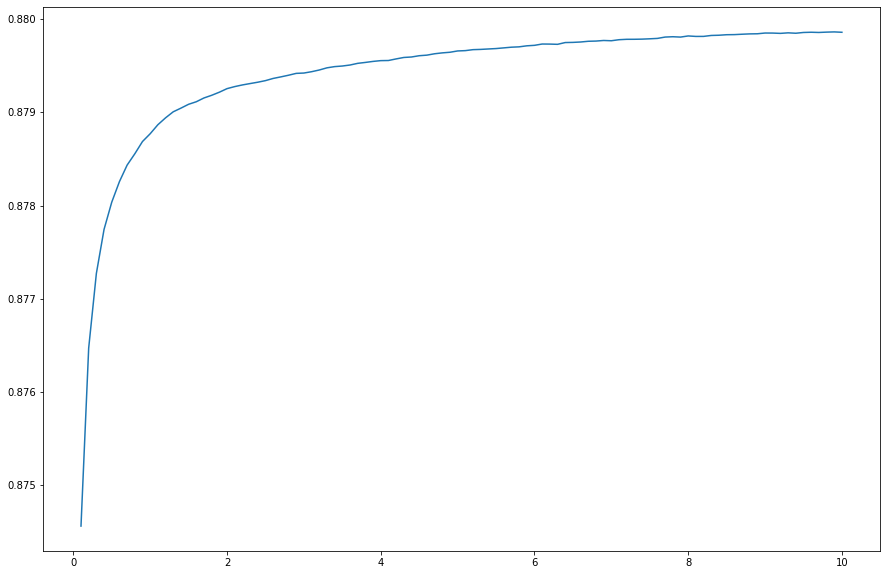

In [22]:
plt.figure(figsize = (15,10))
sns.lineplot(x = x_val, y = y_val)

In [23]:
lr_gs.best_estimator_

LogisticRegression(C=9.9, max_iter=1000, random_state=42)

In [24]:
# alternative model

alp_list = np.linspace(0.001,0.01,10)

best_model = SGDClassifier()

best_parameters = {
                'loss': ["log"],
                'max_iter': [1000],
                'penalty': ['l2'],
                'alpha': alp_list,
                'random_state': [random_state]
                 },

# initiating gridsearch

sgd_gs = GridSearchCV(best_model, best_parameters, cv=cv_no, n_jobs=-1, verbose=2, scoring = "roc_auc")
    
# fitting gridsearch    

sgd_gs.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid=({'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 ]),
                          'loss': ['log'], 'max_iter': [1000],
                          'penalty': ['l2'], 'random_state': [42]},),
             scoring='roc_auc', verbose=2)

In [25]:
# extracting 'C' values and results for graph

x_val = alp_list

y_val = sgd_gs.cv_results_["mean_test_score"]

<AxesSubplot:>

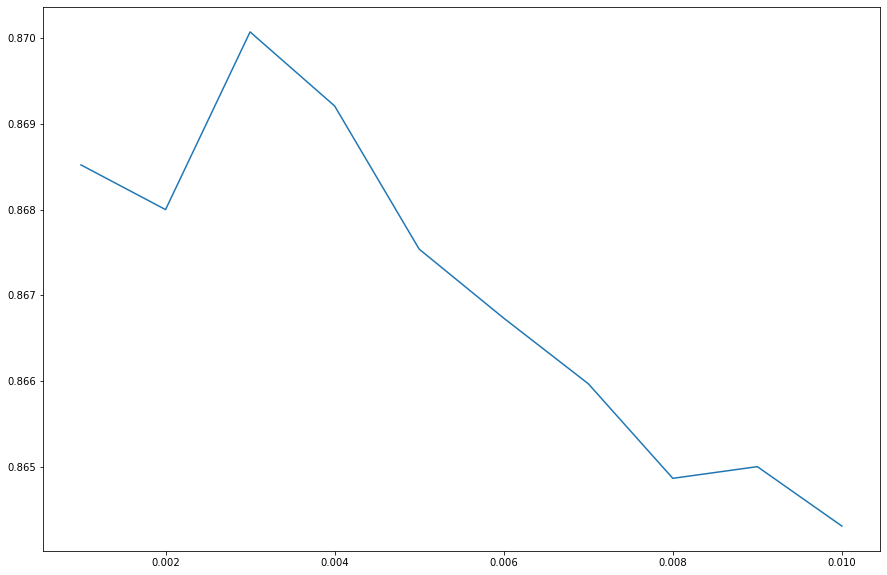

In [26]:
plt.figure(figsize = (15,10))
sns.lineplot(x = x_val, y = y_val)

In [27]:
 sgd_gs.best_estimator_

SGDClassifier(alpha=0.003, loss='log', random_state=42)

## Exploring Feature Weights for Logistic Regression 
[top](#Contents)

- As the Logistic Regression Model returns the log weights of the coefficients, an np.exp function was ran to transform the coeffieicents appropriately
- Most predictors give an emphasis on humidity
- Rainy weather also seems to be an important predictor
- Warm temperatures are a factor, but not as strong as initially thought
- August and September seem to be prime months for WNV propagation


In [28]:
lr_model = lr_gs.best_estimator_

In [29]:
lr_model.coef_

array([[-0.09970608, -0.67147668,  0.40223358,  3.01831392, -0.26421429,
         1.77339129, -4.71413554,  0.1411473 ,  0.42854732, -0.12932255,
        -1.23945234,  4.30144502, -3.61269188,  0.42242208, -0.4013335 ,
         0.32839866,  0.        ,  0.72781804, -2.44677977,  0.94492194,
         0.        , -1.37157274,  0.        , -0.03363678,  0.        ,
         0.        ,  0.81702088, -0.2152695 ,  1.00732699, -3.05551443,
         0.89757445, -3.58302761, -1.1254121 , -0.53320084,  6.80108687,
         0.62380811,  1.72483653, -0.77829057,  0.101869  ,  0.57033431,
        -2.32292298, -0.49459681, -0.08686849, -2.43366981,  2.62523466,
         0.57856411,  0.81850268, -1.6307578 ,  0.8497956 ,  0.65856352,
         1.83183314,  1.12538082,  0.        , -0.05202942, -1.43568476,
         0.07046168,  0.56327698, -2.8568509 , -0.19888784,  1.91162335,
         0.49090853, -3.52740938,  2.68180428,  1.17799974, -2.39880177,
        -0.27847003, -2.66207905,  0.93846247,  1.2

In [30]:
odds = np.exp(lr_model.coef_).round(3).ravel().tolist()

In [31]:
odds

[0.905,
 0.511,
 1.495,
 20.457,
 0.768,
 5.891,
 0.009,
 1.152,
 1.535,
 0.879,
 0.29,
 73.806,
 0.027,
 1.526,
 0.669,
 1.389,
 1.0,
 2.071,
 0.087,
 2.573,
 1.0,
 0.254,
 1.0,
 0.967,
 1.0,
 1.0,
 2.264,
 0.806,
 2.738,
 0.047,
 2.454,
 0.028,
 0.325,
 0.587,
 898.824,
 1.866,
 5.612,
 0.459,
 1.107,
 1.769,
 0.098,
 0.61,
 0.917,
 0.088,
 13.808,
 1.783,
 2.267,
 0.196,
 2.339,
 1.932,
 6.245,
 3.081,
 1.0,
 0.949,
 0.238,
 1.073,
 1.756,
 0.057,
 0.82,
 6.764,
 1.634,
 0.029,
 14.611,
 3.248,
 0.091,
 0.757,
 0.07,
 2.556,
 3.597,
 0.124,
 2.311,
 20.879,
 0.546,
 0.482,
 0.743,
 0.666,
 0.072,
 1.804,
 0.165,
 0.273,
 1.0,
 0.923,
 2.038,
 1.733,
 3.602,
 0.069,
 15.866,
 24.41,
 11.906,
 0.951,
 0.665,
 5.383,
 1.125,
 0.279,
 0.601]

In [32]:
feature_weights = pd.DataFrame(data = odds, 
                               index = X_train.columns, 
                               columns = ['Weight'])

In [33]:
feature_weights.sort_values(by = "Weight", ascending = False).head(20)

,Weight
DewPoint_7,898.824
StnPressure,73.806
Species_CULEX PIPIENS/RESTUANS,24.410
AvgSpeed_14,20.879
Tmin,20.457
Species_CULEX PIPIENS,15.866
DewPoint_14,14.611
BCFG_7,13.808
Species_CULEX RESTUANS,11.906
Tmin_14,6.764


## Exploring Feature Weights for SGDClassifier
[top](#Contents)

- The conclusions largely coincided with the feature importances of the Logistic Regression model

In [34]:
sgd_model = sgd_gs.best_estimator_

In [35]:
sgd_model.coef_

array([[-1.45821604e-01, -5.71644803e-01,  2.82704484e-01,
        -8.76703723e-02,  1.00592006e-01,  1.30947347e-01,
        -2.79742527e-01, -8.57195728e-02, -1.73710341e-02,
         1.26485127e-01, -4.08423655e-01,  3.39882969e-01,
        -3.03411618e-02,  1.12432477e-01, -6.71422506e-02,
         1.99813467e-01,  0.00000000e+00,  1.77615048e-01,
        -9.17306689e-01,  3.45939658e-01,  0.00000000e+00,
        -2.03065808e-01,  0.00000000e+00, -8.80642822e-04,
         0.00000000e+00,  0.00000000e+00,  2.22124185e-01,
         6.02283245e-02,  3.17946048e-01, -4.73231168e-01,
         7.59372497e-03, -2.75425997e-02, -1.92098740e-02,
        -1.69869530e-01,  7.37796716e-01,  4.06244695e-01,
        -5.47268490e-02, -4.48576444e-02, -3.38461771e-01,
        -1.45618976e-01, -1.67342764e-01, -1.32830538e-01,
         3.32409172e-01, -3.32192832e-01,  3.87544686e-01,
         1.05320952e-01,  9.07754130e-02, -6.72273477e-01,
        -9.45493607e-02, -4.51820296e-04,  2.06186392e-0

In [36]:
odds = np.exp(sgd_model.coef_).round(3).ravel().tolist()

In [37]:
feature_weights = pd.DataFrame(data = odds, 
                               index = X_train.columns, 
                               columns = ['Weight'])

In [38]:
feature_weights.sort_values(by = "Weight", ascending = False).head(20)

,Weight
DewPoint_14,2.552
Species_CULEX PIPIENS/RESTUANS,2.142
DewPoint_7,2.091
Species_CULEX PIPIENS,1.990
WetBulb_14,1.725
TSRA_7,1.662
SeaLevel_14,1.609
WetBulb_7,1.501
BCFG_7,1.473
month_8,1.457


## Exporting Dataset for Kaggle Submission
[top](#Contents)

- Logistic Regression was chosen as our final model based on the ROC_AUC scores (lr = 0.88, SGD = 0.87)
- we fitted the model to the full original dataset, imported the full validation dataset and used our model to generate a list of predictions
- The template provided by kaggle was then used to create a final csv file for submission

In [39]:
sample = pd.read_csv('data/samplesubmission.csv')

In [40]:
# cross check for matching no of rows

print(to_predict.shape)
print(sample.shape)

(116293, 95)
(116293, 2)


In [41]:
# using model to predict results

X_predict = ss.fit_transform(to_predict)
preds = sgd_model.predict(X_predict)

In [42]:
# attaching predictions to the sample df

sample['WnvPresent'] = preds
sample['WnvPresent'].value_counts()

0    83362
1    32931
Name: WnvPresent, dtype: int64

In [43]:
# exporting to csv file

sample.to_csv('results/submission.csv', index = False)

## Discussion, Recommendations and Further Study
[top](#Contents)

#### Discussion

As mentioned earlier, most predictors give an emphasis on humidity and rains. 

It can be reasonably concluded that a higher humidity, coupled with rainy weather, would lead to a larger number of bodies of stagnant water. This, in turn, gives mosquitos favorable conditions for breeding and thus increase the chance that the WNV would be transmitted. 

Surprisingly, warmer temperatures were not as great a factor as initially believed. Indeed, further research showed that the temperature range was well within the tolerances of mosquitos.

Further research also showed that August and September is considered the end of the thunderstorm season for Chicago (something our data also verified), and again returns back to the earlier discussion of higher humidity.

#### Recommendation

Our data showed that spraying, as it had been conducted, did not seem to be very effective. 

In our <a href = "presentation.pdf">final presentation</a> We instead recommend a combination onsider oil treatment of stagnant water bodies to kill off larvae, coupled with an education and awareness campaign as well as an emphasis on smart engineering for water infrastructure projects.

#### Further Study

Our Logistic Regression model obtained a score of 0.62 on Kaggle. Interestingly, when we submitted predictions based on the SGDClassifier model as a quick cross-validation, we obtained a higher score of 0.66, an inversion of what our modeling showed earlier. 

As our training dataset contained a much smaller amount of data as compared with the number of predictions we had to make, we believe that the training data might contain some bias that makes it misrepresentative of the actual conditions. 

A futher study would include a larger dataset, for a clearer examination of feature importance.